# Support Vector Machines (SVM)
## Máquinas de vectores de soporte

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

from scipy import stats


## Problema biclase con clases linealmente separables

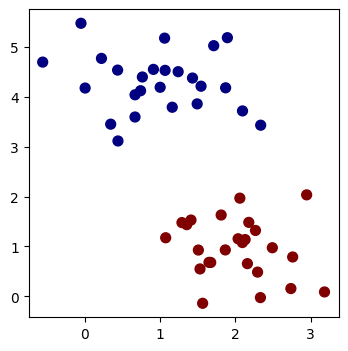

In [2]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet');

### Posibles soluciones:

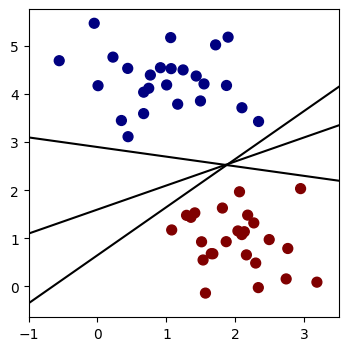

In [3]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
# plt.plot([0.6], [2.65], "*", color='red', markeredgewidth=1.3, markersize=13)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

## Maximizar la margen

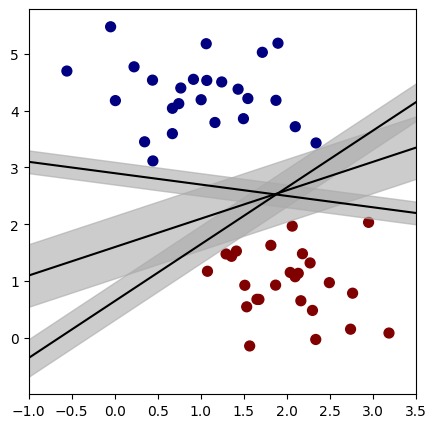

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.6)
plt.xlim(-1, 3.5);

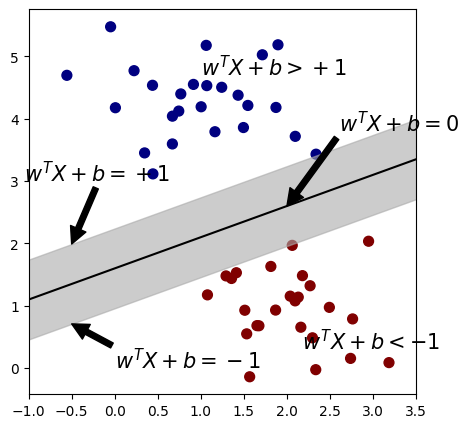

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

m, b, d = (0.5, 1.6, 0.64)
yfit = m * xfit + b
plt.plot(xfit, yfit, '-k')
plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                 color='#AAAAAA', alpha=0.6)
plt.text(2.1,0.3," $w^TX+b<-1$", fontsize=15)
plt.text(1,4.7,"$w^TX+b>+1$", fontsize=15)
plt.annotate('$w^TX+b=0$', xy=(2, m * 2 + b), xytext=(2.6, 3.8),
            arrowprops=dict(facecolor='black', shrink=1), fontsize=15)
plt.annotate('$w^TX+b=+1$', xy=(-0.5, m * -0.5 + b+d), xytext=(-1.05, 3),
            arrowprops=dict(facecolor='black', shrink=1), fontsize=15)
plt.annotate('$w^TX+b=-1$', xy=(-0.5, m * -0.5 + b-d), xytext=(0, 0),
            arrowprops=dict(facecolor='black', shrink=1), fontsize=15)
plt.xlim(-1, 3.5);


## SVM con sklearn

In [6]:

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, c = 4*np.ones(model.support_vectors_.shape[0]), linewidth=1, alpha=0.3);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

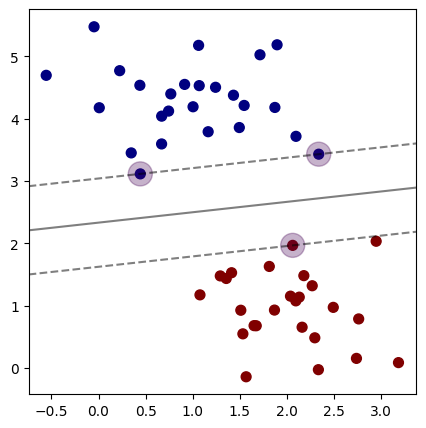

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E8)
model.fit(X, y)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(model)

## Datos no separables

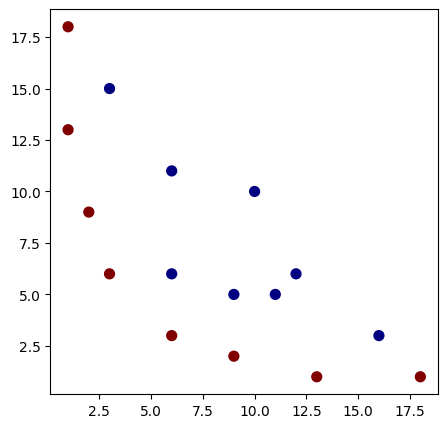

In [8]:
x1 = np.expand_dims(np.array([1,1,2,3,3,6,6,6,9,9,10,11,12,13,16,18]), axis = 1)
x2 = np.expand_dims(np.array([18,13,9,6,15,11,6,3,5,2,10,5,6,1,3,1]), axis = 1)
y = np.array([1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1])

X = np.hstack((x1,x2))

fig = plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plt.show()

## Qué hace SVM con estos datos?

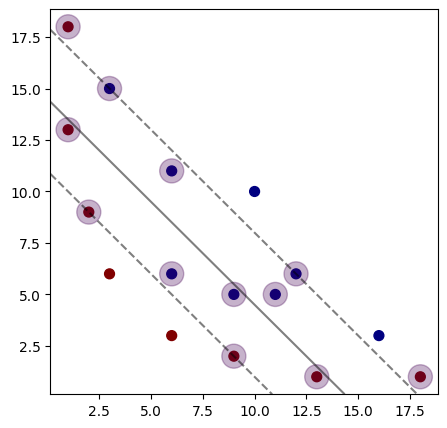

In [9]:
model = SVC(kernel='linear', C=1E1)
model.fit(X, y)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(model, plot_support=True)

## Kernels

Primero recordemos producto punto:

Sean $\mathbf{u}$ y $\mathbf{v}$ dos vectores, se define el producto punto como:

\begin{equation}
\left\langle \mathbf{u}, \mathbf{v} \right\rangle = \left\Vert \mathbf{u} \right\Vert \left\Vert \mathbf{v} \right\Vert \cos{\theta}
\end{equation}

donde $\theta$ es el ángulo entre ellos. El producto punto da una medida de similitud.


Transformemos los datos:

\begin{equation*}
\varphi: \mathbb{R}^2 \longrightarrow\mathbb{R}^3
\end{equation*}

\begin{equation*}
(f_1,f_2) \mapsto (f_1^2, \sqrt{2}f_1f_2, f_2^2)
\end{equation*}


In [10]:
x_1 = np.expand_dims(X[:,0]**2 , axis = 1)       
x_2 = np.expand_dims(np.sqrt(2)*X[:,0]*X[:,1] , axis = 1)      
x_3 = np.expand_dims(X[:,1]**2 , axis = 1)

X_t = np.hstack((x_1, x_2, x_3))

In [11]:
fig = px.scatter_3d(x=X_t[:,0], y=X_t[:,1], z=X_t[:,2], color=y, opacity=0.8, color_continuous_scale='jet')
fig.update_traces(marker_size = 8)
fig.update_scenes(aspectratio=dict(x=1, y=1, z=1),aspectmode='manual')
fig.show()

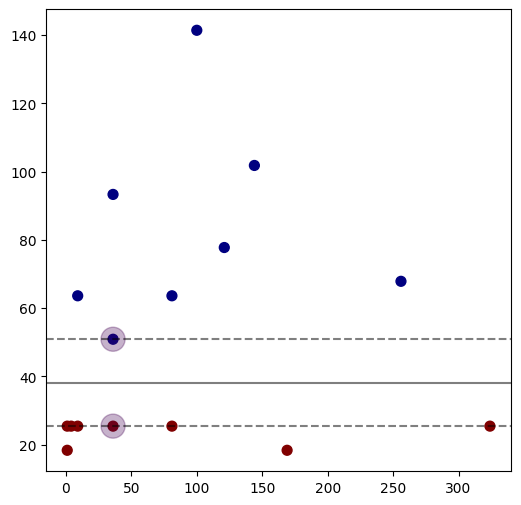

In [12]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E3)
model.fit(X_t[:,:2], y)

plt.figure(figsize=(6,6))
plt.scatter(X_t[:, 0], X_t[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(model, plot_support=True)

## Ahora un ejemplo:


Sea una transformación:

$$\varphi: \mathbb{R}^2 \longrightarrow\mathbb{R}^3 $$
$$\left(f_1,f_2\right) \mapsto \left(f_1^2, \sqrt{2}f_1f_2, f_2^2\right)$$


¿Cuál es el valor del producto punto entre dos vectores $\mathbf{a}$ y $\mathbf{b} \in \mathbb{R}^2$? ¿y el producto punto entre ellos transformados?

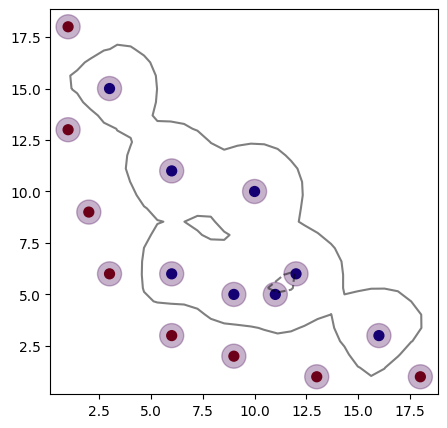

In [13]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(model, plot_support=True)

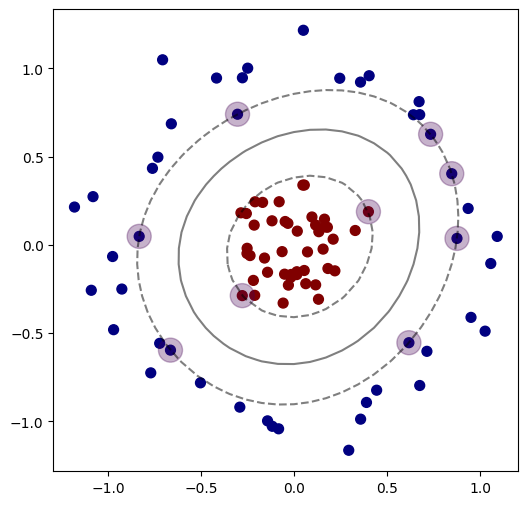

In [14]:
from sklearn.datasets import make_circles
X,y = make_circles(90, factor=0.2, noise=0.1) 

model = SVC(kernel='rbf', C=1E4, gamma='auto')
model.fit(X, y)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plot_svc_decision_function(model, plot_support=True)